In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from sourcesep.sim import SimData
from sourcesep.utils.config import load_config

xr.set_options(display_style="html", display_expand_data=False)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'

paths = load_config(dataset_key="all")
sim = SimData(n_samples=6000, cfg_path=paths["root"] / "sim_config.toml")
dat = sim.compose()

Paths are for dataset tagged: all
Paths are for dataset tagged: all


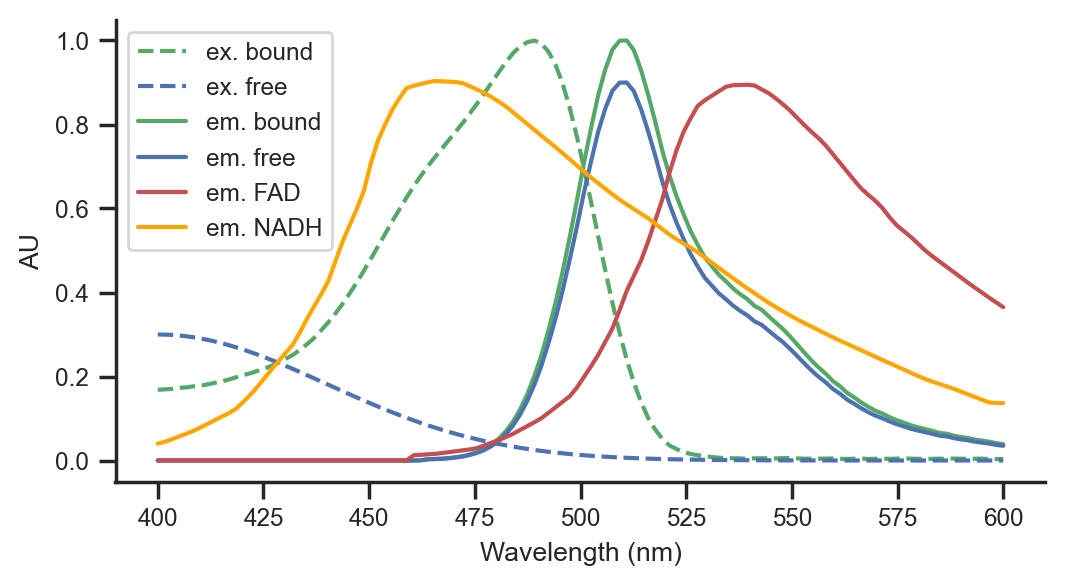

In [2]:
S = sim.get_S_synthetic()
S_autofl = sim.get_S_autofl()

f, ax = plt.subplots(figsize=(6, 3))
ax.plot(
    dat["L_arr"],
    dat["Wb_full"].reshape(
        -1,
    ),
    "--g",
    label="ex. bound",
)
ax.plot(
    dat["L_arr"],
    dat["Wf_full"].reshape(
        -1,
    ),
    "--b",
    label="ex. free",
)
ax.plot(
    dat["L_arr"],
    dat["Sf"].reshape(
        -1,
    ),
    "g",
    label="em. bound",
)
ax.plot(
    dat["L_arr"],
    0.9
    * dat["Sb"].reshape(
        -1,
    ),
    "b",
    label="em. free",
)
ax.plot(dat["L_arr"], S_autofl[0, :], "r", label="em. FAD")
ax.plot(dat["L_arr"], S_autofl[1, :], "orange", label="em. NADH")
ax.set(xlabel="Wavelength (nm)", ylabel="AU")
plt.legend()
plt.show()

In [3]:
lam_ = [sim.cfg["laser"][key]["em_wavelength_nm"] for key in sim.cfg["laser"].keys()]
print(lam_)

[405, 445, 473, 514, 561]


In [4]:
dat.keys()

dict_keys(['O', 'OK', 'fb', 'ff', 'f_rest', 'f_dynamic_range', 'Wb', 'Wf', 'Wb_full', 'Wf_full', 'Sb', 'Sf', 'P', 'fSWPH', 'fSWPH_autofl', 'f0SWPH', 'C_HbO', 'C_HbR', 'C_HbT', 'f_HbO', 'Mu_HbO', 'Mu_HbR', 'notches', 'T_arr', 'L_arr'])

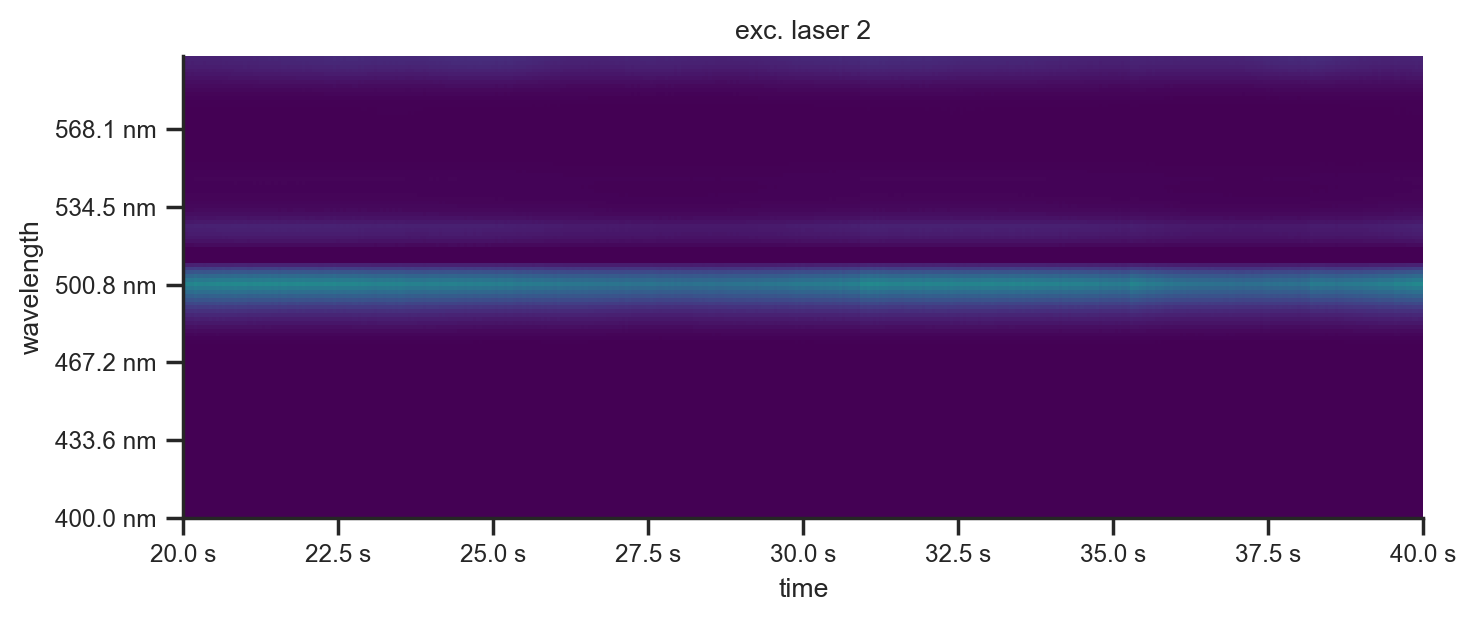

In [5]:
f, ax, img = sim.plot2d(
    X=dat["OK"], J=2, L_range=(400, 600), L_arr=dat["L_arr"], T_range=(20, 40), T_arr=dat["T_arr"], ax=None
)
img.set_clim(0, 0.05)

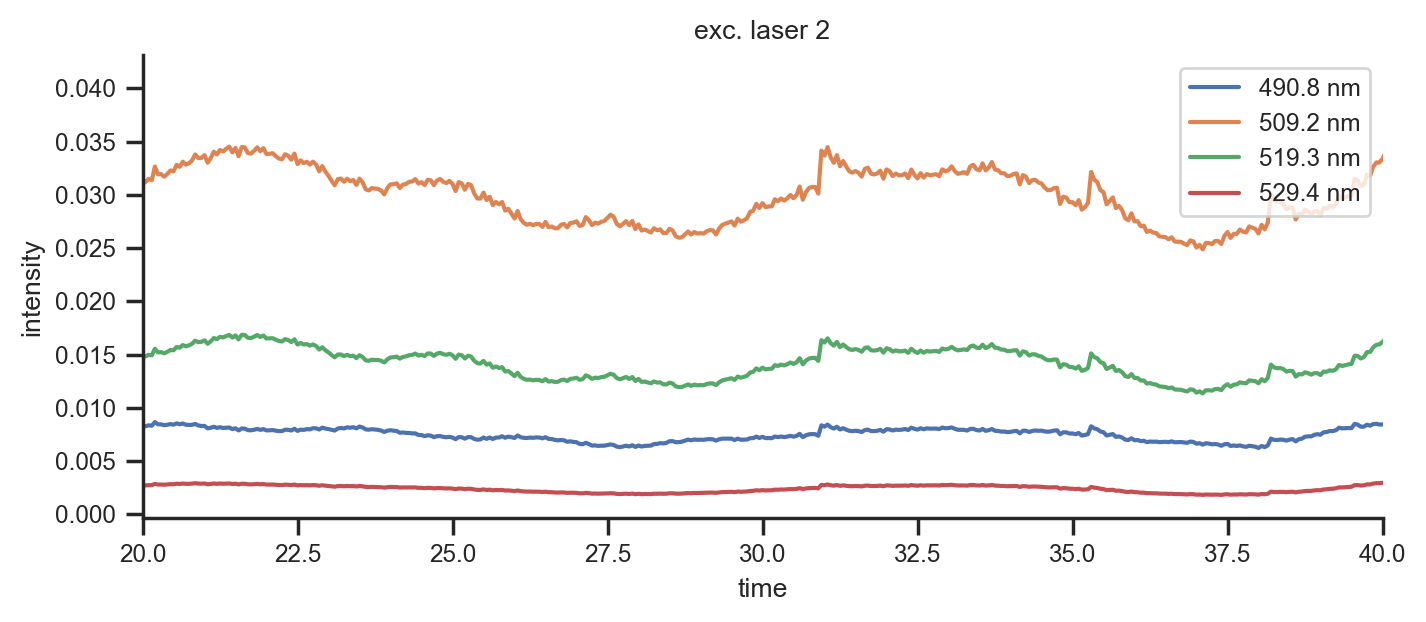

In [6]:
f, ax = sim.plot1d_time(X=dat["fSWPH"], J=2, L_=[490, 510, 520, 530], L_arr=dat["L_arr"], T_arr=dat["T_arr"], ax=None)
ax.set_xlim(20, 40)
plt.show()

In [7]:
dat["fSWPH"].shape

(6000, 5, 120)

In [8]:
# create a dataset with xarray
lam_ = [sim.cfg["laser"][key]["em_wavelength_nm"] for key in sim.cfg["laser"].keys()]

x = xr.DataArray(
    dat["fSWPH"],
    dims=("time", "laser", "wavelength"),
    coords={"time": dat["T_arr"], "laser": lam_, "wavelength": dat["L_arr"]},
)

x

<xarray.DataArray (time: 6000, laser: 5, wavelength: 120)>
0.0 0.0 0.0 0.0 0.0 0.0 ... 1.751e-05 2.088e-05 2.37e-05 2.524e-05 2.734e-05
Coordinates:
  * time        (time) float64 0.0 0.05 0.1 0.15 0.2 ... 299.8 299.8 299.9 299.9
  * laser       (laser) int64 405 445 473 514 561
  * wavelength  (wavelength) float64 400.0 401.7 403.4 ... 596.6 598.3 600.0

In [9]:
# concatenating xarray datasets with coordinates:
y = xr.concat([x.loc[:, :, 450:470], x.loc[:, :, 500:520]], dim="wavelength")
y

<xarray.DataArray (time: 6000, laser: 5, wavelength: 24)>
0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0001148 0.0001042 9.145e-05 7.416e-05 5.869e-05
Coordinates:
  * time        (time) float64 0.0 0.05 0.1 0.15 0.2 ... 299.8 299.8 299.9 299.9
  * laser       (laser) int64 405 445 473 514 561
  * wavelength  (wavelength) float64 450.4 452.1 453.8 ... 516.0 517.6 519.3

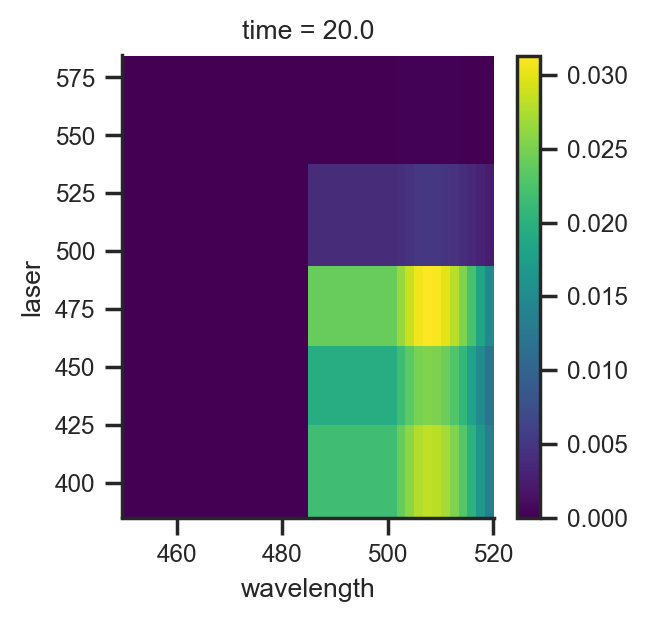

In [10]:
# quick plots of slices
(y.sel(time=20, method="nearest")).plot(aspect=1, size=3)

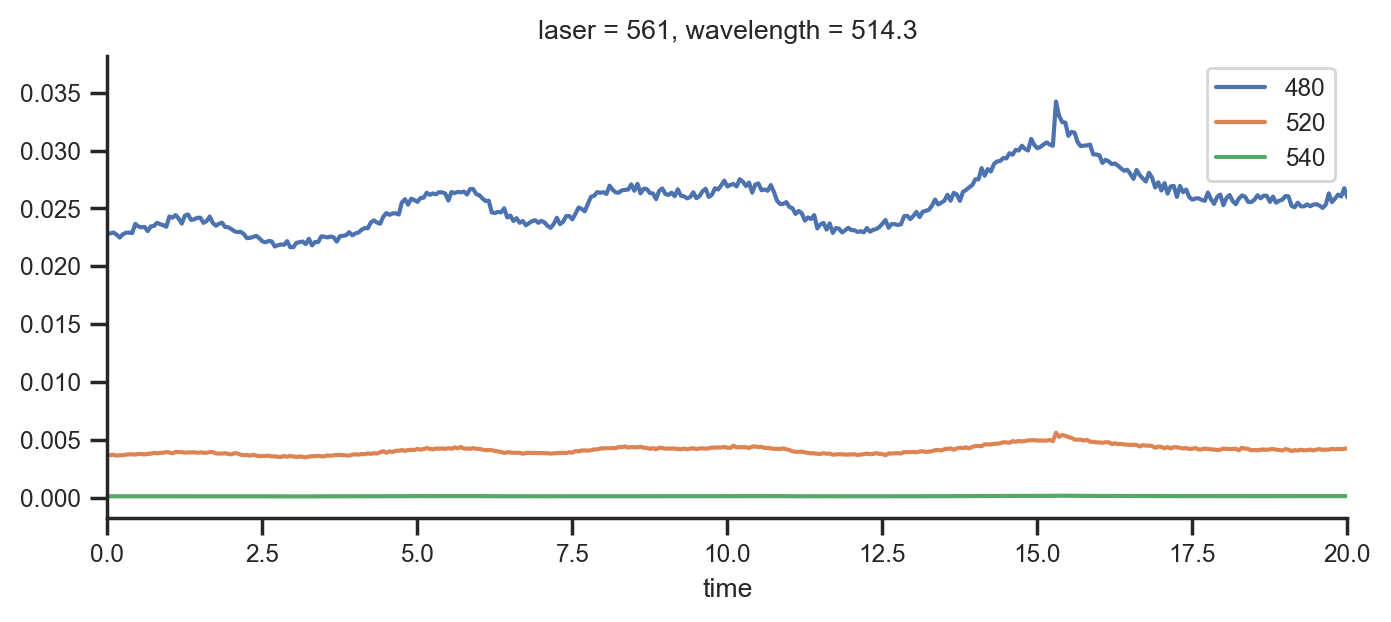

In [11]:
f, ax = plt.subplots(1, 1, figsize=(8, 3))
(x.sel(wavelength=514, laser=480, method="nearest")).plot(ax=ax, label=480)
(x.sel(wavelength=514, laser=520, method="nearest")).plot(ax=ax, label=520)
(x.sel(wavelength=514, laser=540, method="nearest")).plot(ax=ax, label=540)
ax.set(xlim=(0, 20))
ax.legend()
plt.show()